In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
data_dir = "./jena_climate/jena_climate_2009_2016.csv"

In [3]:
data = pd.read_csv(data_dir, parse_dates=[0])
data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,2009-01-01 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,2009-01-01 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,2009-01-01 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,2009-01-01 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date Time        420451 non-null  datetime64[ns]
 1   p (mbar)         420451 non-null  float64       
 2   T (degC)         420451 non-null  float64       
 3   Tpot (K)         420451 non-null  float64       
 4   Tdew (degC)      420451 non-null  float64       
 5   rh (%)           420451 non-null  float64       
 6   VPmax (mbar)     420451 non-null  float64       
 7   VPact (mbar)     420451 non-null  float64       
 8   VPdef (mbar)     420451 non-null  float64       
 9   sh (g/kg)        420451 non-null  float64       
 10  H2OC (mmol/mol)  420451 non-null  float64       
 11  rho (g/m**3)     420451 non-null  float64       
 12  wv (m/s)         420451 non-null  float64       
 13  max. wv (m/s)    420451 non-null  float64       
 14  wd (deg)         420

In [5]:
temp = data['T (degC)']
temp

0        -8.02
1        -8.41
2        -8.51
3        -8.31
4        -8.27
          ... 
420446   -4.05
420447   -3.35
420448   -3.16
420449   -4.23
420450   -4.82
Name: T (degC), Length: 420451, dtype: float64

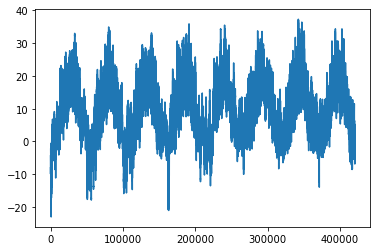

In [6]:
plt.plot(
  range(len(temp)), temp
)
plt.show()

In [7]:
temp = data['T (degC)'][:1440]
temp

0       -8.02
1       -8.41
2       -8.51
3       -8.31
4       -8.27
        ...  
1435   -10.66
1436   -10.43
1437   -10.90
1438   -10.87
1439   -10.75
Name: T (degC), Length: 1440, dtype: float64

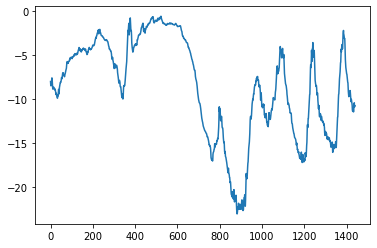

In [8]:
plt.plot(
  range(len(temp)), temp
)
plt.show()

In [9]:
lookback = 720 # look back 5 days
steps = 6
delay = 144

In [10]:
scaler = StandardScaler()

In [11]:
data_copy = data.copy()
data_copy.set_index('Date Time', drop=True, inplace=True)

In [12]:
data_copy = scaler.fit_transform(data_copy)
data_copy

array([[ 0.87416003, -2.07374652, -2.12717053, ..., -0.71363925,
        -0.76154527, -0.25873597],
       [ 0.88014129, -2.12004461, -2.17302693, ..., -0.91469929,
        -0.86836101, -0.44563922],
       [ 0.87535628, -2.13191591, -2.18478498, ..., -1.25844709,
        -1.2400798 , -0.03606729],
       ...,
       [ 1.26892311, -1.49680119, -1.58512434, ..., -0.68121021,
        -0.65472953,  0.46695626],
       [ 1.26772686, -1.62382414, -1.71093549, ..., -0.4152921 ,
        -0.58636745,  0.58925098],
       [ 1.26892311, -1.69386482, -1.77913219, ..., -0.5839231 ,
        -0.67182005,  0.11737797]])

In [14]:
with open(data_dir, encoding='utf-8') as f:
  data = f.read()

In [15]:
lines = data.split("\n")

In [16]:
header = lines[0].split(',')
header = [x.replace('"', "") for x in header]
header

['Date Time',
 'p (mbar)',
 'T (degC)',
 'Tpot (K)',
 'Tdew (degC)',
 'rh (%)',
 'VPmax (mbar)',
 'VPact (mbar)',
 'VPdef (mbar)',
 'sh (g/kg)',
 'H2OC (mmol/mol)',
 'rho (g/m**3)',
 'wv (m/s)',
 'max. wv (m/s)',
 'wd (deg)']

In [17]:
lines = lines[1:]
lines

['01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30',
 '01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10',
 '01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60',
 '01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.00',
 '01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.30',
 '01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.70',
 '01.01.2009 01:10:00,996.50,-7.62,265.81,-8.30,94.80,3.44,3.26,0.18,2.04,3.27,1305.68,0.18,0.63,166.50',
 '01.01.2009 01:20:00,996.50,-7.62,265.81,-8.36,94.40,3.44,3.25,0.19,2.03,3.26,1305.69,0.19,0.50,118.60',
 '01.01.2009 01:30:00,996.50,-7.91,265.52,-8.73,93.80,3.36,3.15,0.21,1.97,3.16,1307.17,0.28,0.75,188.50',
 '01.01.2009 01:40:00,996.53,-8.43,264.99,-9.3

In [18]:
len(lines)

420451

In [19]:
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i, :] = values

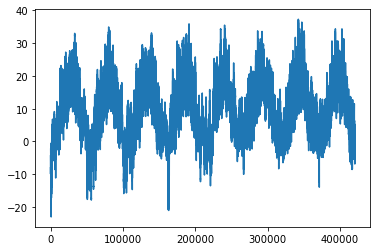

In [19]:
import matplotlib.pyplot as plt

temp = float_data[:, 1]
plt.plot(range(len(temp)), temp)

In [20]:
# Normalizing the Data

mean = float_data.mean(axis=0)
float_data -= mean
std = float_data.std(axis=0)
float_data /= std

In [21]:
float_data

array([[ 0.87416003, -2.07374652, -2.12717053, ..., -0.71363925,
        -0.76154527, -0.25873597],
       [ 0.88014129, -2.12004461, -2.17302693, ..., -0.91469929,
        -0.86836101, -0.44563922],
       [ 0.87535628, -2.13191591, -2.18478498, ..., -1.25844709,
        -1.2400798 , -0.03606729],
       ...,
       [ 1.26892311, -1.49680119, -1.58512434, ..., -0.68121021,
        -0.65472953,  0.46695626],
       [ 1.26772686, -1.62382414, -1.71093549, ..., -0.4152921 ,
        -0.58636745,  0.58925098],
       [ 1.26892311, -1.69386482, -1.77913219, ..., -0.5839231 ,
        -0.67182005,  0.11737797]])

In [22]:
def generator(
  data, lookback, delay,
  min_index, max_index, shuffle=False,
  batch_size=128, step=6):

  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback

  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size
      )
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)

    samples = np.zeros((
      len(rows),
      lookback // step,
      data.shape[-1]
    ))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [23]:
lookback = 1440
step = 6
delay = 144
batch_size = 128

In [24]:
train_gen = generator(
  float_data,
  lookback,
  delay,
  0, 200000,
  True,
  step, batch_size
)

val_gen = generator(
  float_data,
  lookback=lookback,
  delay=delay,
  min_index=200001,
  max_index=300000,
  step=step,
  batch_size=batch_size
)

test_gen = generator(
  float_data,
  lookback=lookback,
  delay=delay,
  min_index=300001,
  max_index=None,
  step=step,
  batch_size=batch_size
)

In [86]:
val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

In [87]:
# def naive_method():
#   batch_maes = []
#   for step in range(val_steps):
#     samples, targets = next(val_gen)
#     preds = samples[:, -1, 1]
#     mae = np.mean(np.abs(preds - targets))
#     batch_maes.append(mae)
#   print(np.mean(batch_maes))

In [88]:
# naive_method()

In [89]:
0.29 * std[1]

2.4428657665055913

Basic ML Approach

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dense
from keras.optimizers import RMSprop

In [91]:
shape = (lookback // step, float_data.shape[-1])
shape

(240, 14)

In [92]:
model = Sequential([
  Flatten(input_shape=shape),
  Dense(32, activation='relu'),
  Dense(1)
])

In [93]:
model.compile(optimizer=RMSprop(), loss="mae")
history = model.fit(
  train_gen,
  steps_per_epoch=500,
  epochs=20,
  validation_data=val_gen,
  validation_steps=val_steps
)

ValueError: could not broadcast input array from shape (12,14) into shape (11,14)

In [27]:
def generator(data, lookback, delay, min_index, max_index=None, shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),
                        lookback // step,
                        data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [7]:
from keras.layers import GRU

In [96]:
model = Sequential([
    GRU(32, input_shape=(None, float_data.shape[-1])),
    Dense(1)
])

In [97]:
model.compile(
    optimizer=RMSprop(),
    loss='mae'
)

history = model.fit(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen
)

StopIteration: 

In [8]:
from keras.datasets import imdb
from tensorflow.keras.utils import pad_sequences
from keras.layers import Embedding, Dense, Flatten, LSTM, Bidirectional, Conv1D, MaxPooling1D
from keras.layers import GlobalMaxPooling1D

In [9]:
max_features = 10000
maxlen = 500

In [10]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    num_words=max_features
)

In [105]:
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

In [11]:
x_train = pad_sequences(x_train, maxlen)
x_test = pad_sequences(x_test, maxlen)

In [110]:
model = Sequential([
    Embedding(max_features, 128),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

In [111]:
model.compile(
    optimizer='rmsprop',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [112]:
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 141s 817ms/step - loss: 0.5145 - accuracy: 0.7470 - val_loss: 0.3481 - val_accuracy: 0.8638
Epoch 2/10
157/157 [==============================] - 193s 1s/step - loss: 0.3177 - accuracy: 0.8755 - val_loss: 0.3109 - val_accuracy: 0.8760
Epoch 3/10
157/157 [==============================] - 105s 667ms/step - loss: 0.2570 - accuracy: 0.9037 - val_loss: 0.3141 - val_accuracy: 0.8884
Epoch 4/10
157/157 [==============================] - 114s 727ms/step - loss: 0.2146 - accuracy: 0.9240 - val_loss: 0.4810 - val_accuracy: 0.7934
Epoch 5/10
157/157 [==============================] - 131s 836ms/step - loss: 0.1867 - accuracy: 0.9344 - val_loss: 0.3748 - val_accuracy: 0.8582
Epoch 6/10
157/157 [==============================] - 220s 1s/step - loss: 0.1837 - accuracy: 0.9389 - val_loss: 0.3447 - val_accuracy: 0.8702
Epoch 7/10
157/157 [==============================] - 269s 2s/step - loss: 0.1528 - accuracy: 0.9491 - val_loss: 0.3618 - val_accu

In [114]:
model = Sequential([
    Embedding(max_features, 32),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

In [115]:
model.compile(
    loss="binary_crossentropy",
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [116]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense_22 (Dense)            (None, 1)                 65        
                                                                 
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [117]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 216s 1s/step - loss: 0.5673 - accuracy: 0.7085 - val_loss: 0.5425 - val_accuracy: 0.7328
Epoch 2/10
157/157 [==============================] - 197s 1s/step - loss: 0.3480 - accuracy: 0.8601 - val_loss: 0.3752 - val_accuracy: 0.8456
Epoch 3/10
157/157 [==============================] - 189s 1s/step - loss: 0.2694 - accuracy: 0.8998 - val_loss: 0.3380 - val_accuracy: 0.8678
Epoch 4/10
157/157 [==============================] - 188s 1s/step - loss: 0.2339 - accuracy: 0.9159 - val_loss: 0.3066 - val_accuracy: 0.8830
Epoch 5/10
157/157 [==============================] - 193s 1s/step - loss: 0.2004 - accuracy: 0.9287 - val_loss: 0.3506 - val_accuracy: 0.8738
Epoch 6/10
157/157 [==============================] - 196s 1s/step - loss: 0.1798 - accuracy: 0.9387 - val_loss: 0.3383 - val_accuracy: 0.8810
Epoch 7/10
157/157 [==============================] - 186s 1s/step - loss: 0.1636 - accuracy: 0.9434 - val_loss: 0.3668 - val_accuracy: 0.8426

In [121]:
model = Sequential([
    Embedding(max_features, 128, input_length=maxlen),
    Conv1D(32, 7, activation='relu'),
    MaxPooling1D(5),
    Conv1D(32, 7, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(1)
])

In [122]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 494, 32)           28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 98, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 92, 32)            7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_23 (Dense)            (None, 1)               

In [123]:
model.compile(
    optimizer = RMSprop(
    learning_rate=1e-4
    ),
    loss="binary_crossentropy",
    metrics=['accuracy']
)

In [124]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
157/157 [==============================] - 106s 646ms/step - loss: 0.7131 - accuracy: 0.5375 - val_loss: 0.6801 - val_accuracy: 0.5764
Epoch 2/10
157/157 [==============================] - 85s 539ms/step - loss: 0.6562 - accuracy: 0.6790 - val_loss: 0.6469 - val_accuracy: 0.6858
Epoch 3/10
157/157 [==============================] - 89s 552ms/step - loss: 0.5954 - accuracy: 0.7767 - val_loss: 0.5661 - val_accuracy: 0.7618
Epoch 4/10
157/157 [==============================] - 85s 539ms/step - loss: 0.4749 - accuracy: 0.8288 - val_loss: 0.4506 - val_accuracy: 0.8194
Epoch 5/10
157/157 [==============================] - 85s 543ms/step - loss: 0.3731 - accuracy: 0.8645 - val_loss: 0.4004 - val_accuracy: 0.8470
Epoch 6/10
157/157 [==============================] - 76s 484ms/step - loss: 0.3195 - accuracy: 0.8849 - val_loss: 0.3791 - val_accuracy: 0.8654
Epoch 7/10
157/157 [==============================] - 74s 471ms/step - loss: 0.2862 - accuracy: 0.8990 - val_loss: 0.3785 - val_a

In [26]:
step = 3
lookback = 720
delay = 144

In [28]:
train_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=0,
    max_index=200000,
    shuffle=True,
    step=step
)

val_gen = generator(
    float_data,
    lookback=lookback,
    delay=delay,
    min_index=200001,
    max_index=300000,
    step=step
)

test_gen = generator(
  float_data,
  lookback=lookback,
  delay=delay,
  min_index=300001,
  step=step
)

In [30]:
model = Sequential([
  Conv1D(32, 5, activation='relu', input_shape=(None, float_data.shape[-1])),
  MaxPooling1D(3),
  Conv1D(32, 5, activation="relu"),
  MaxPooling1D(3),
  Conv1D(32, 5, activation='relu'),
  GlobalMaxPooling1D(),
  Dense(1)
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, None, 32)          2272      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, None, 32)          5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 32)         0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, None, 32)          5152      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0

In [34]:
model.compile(
    loss="mae",
    optimizer=RMSprop(),
)

history = model.fit(
    train_gen,
    steps_per_epoch=500,
    epochs=20,
    validation_data=val_gen,
    validation_steps=3
)

Epoch 1/20
500/500 [==============================] - 36s 67ms/step - loss: 0.3388 - val_loss: 0.5077
Epoch 2/20
500/500 [==============================] - 35s 70ms/step - loss: 0.3247 - val_loss: 0.1845
Epoch 3/20
500/500 [==============================] - 32s 63ms/step - loss: 0.3144 - val_loss: 0.3618
Epoch 4/20
500/500 [==============================] - 32s 64ms/step - loss: 0.3055 - val_loss: 1.0968
Epoch 5/20
500/500 [==============================] - 32s 64ms/step - loss: 0.2996 - val_loss: 0.4134
Epoch 6/20
500/500 [==============================] - 35s 71ms/step - loss: 0.2927 - val_loss: 0.1656
Epoch 7/20
500/500 [==============================] - 33s 66ms/step - loss: 0.2904 - val_loss: 0.3703
Epoch 8/20
500/500 [==============================] - 35s 70ms/step - loss: 0.2837 - val_loss: 0.2931
Epoch 9/20
500/500 [==============================] - 37s 73ms/step - loss: 0.2809 - val_loss: 0.3823
Epoch 10/20
500/500 [==============================] - 36s 72ms/step - loss: 0.275

Keras Functional API

In [181]:
from keras import Input, layers
from keras.models import Sequential, Model

In [182]:
input_tensor = Input(shape=(32, ))
dense = Dense(32, activation="relu")
output_tensor = dense(input_tensor)

In [183]:
model = Sequential([
    Dense(32, activation="relu", input_shape=(64,)),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")
])

In [184]:
input_tensor = Input(shape=(64, ))
x = Dense(32, activation="relu")(input_tensor)
x = Dense(32, activation="relu")(x)
output_tensor = Dense(10, activation="softmax")(x)

model = Model(input_tensor, output_tensor)
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense_25 (Dense)            (None, 32)                2080      
                                                                 
 dense_26 (Dense)            (None, 32)                1056      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


In [185]:
unrelated_input = Input(shape=(32,))
bad_model = Model(unrelated_input, output_tensor)

ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 64), dtype=tf.float32, name='input_8'), name='input_8', description="created by layer 'input_8'") at layer "dense_25". The following previous layers were accessed without issue: []

In [186]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy'
)

In [187]:
x_train = np.random.random((1000, 64))
y_train = np.random.random((1000, 10))

In [188]:
model.fit(x_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
8/8 [==============================] - 2s 3ms/step - loss: 11.6532
Epoch 2/10
8/8 [==============================] - 0s 5ms/step - loss: 11.7110
Epoch 3/10
8/8 [==============================] - 0s 5ms/step - loss: 12.0670
Epoch 4/10
8/8 [==============================] - 0s 4ms/step - loss: 12.7090
Epoch 5/10
8/8 [==============================] - 0s 3ms/step - loss: 13.5565
Epoch 6/10
8/8 [==============================] - 0s 5ms/step - loss: 14.7213
Epoch 7/10
8/8 [==============================] - 0s 4ms/step - loss: 16.2106
Epoch 8/10
8/8 [==============================] - 0s 5ms/step - loss: 17.9520
Epoch 9/10
8/8 [==============================] - 0s 6ms/step - loss: 19.9588
Epoch 10/10
8/8 [==============================] - 0s 3ms/step - loss: 22.0445


In [189]:
score = model.evaluate(x_train, y_train)

32/32 [==============================] - 0s 2ms/step - loss: 23.4178


Multi-Input Models

In [235]:
text_vocabulary_size = 10000
question_vocabulary_size = 10000
answer_vocabulary_size = 500

text_input = Input(shape=(None,), dtype="int32", name='text')

embedded_text = Embedding(
    64, text_vocabulary_size
)(text_input)

encoded_text = LSTM(32)(embedded_text)

question_input = Input(shape=(None,), dtype="int32", name="question")

embedded_question = Embedding(
    32, question_vocabulary_size
)(question_input)

encoded_question = LSTM(16)(embedded_question)
concatenated = layers.concatenate([
    encoded_text, encoded_question
], axis=-1)

answer = Dense(answer_vocabulary_size, activation="softmax")(concatenated)

model = Model([
    text_input, question_input
], answer)

model.compile(optimizer="rmsprop",
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [236]:
num_samples = 1000
max_length = 100

In [237]:
text = np.random.randint(
    1, text_vocabulary_size,
    size=(num_samples, max_length)
)

In [238]:
question = np.random.randint(
    1, question_vocabulary_size, size=(num_samples, max_length)
)

answers = np.random.randint(
    0, 1,
    size=(num_samples, answer_vocabulary_size)
)

In [239]:
model.fit(
    [text, question], answers, epochs=10,
    batch_size=128
)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node 'model_15/embedding_19/embedding_lookup' defined at (most recent call last):
    File "c:\Users\USER\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\USER\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "c:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "c:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "c:\Users\USER\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "c:\Users\USER\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\USER\anaconda3\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "c:\Users\USER\anaconda3\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "c:\Users\USER\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "c:\Users\USER\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 471, in dispatch_queue
      await self.process_one()
    File "c:\Users\USER\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 460, in process_one
      await dispatch(*args)
    File "c:\Users\USER\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 367, in dispatch_shell
      await result
    File "c:\Users\USER\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 662, in execute_request
      reply_content = await reply_content
    File "c:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 360, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "c:\Users\USER\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 532, in run_cell
      return super().run_cell(*args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2863, in run_cell
      result = self._run_cell(
    File "c:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2909, in _run_cell
      return runner(coro)
    File "c:\Users\USER\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "c:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "c:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3309, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "c:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3369, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\USER\AppData\Local\Temp\ipykernel_932\2680939369.py", line 1, in <cell line: 1>
      model.fit(
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
      y_pred = self(x, training=True)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\USER\anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 199, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_15/embedding_19/embedding_lookup'
indices[120,0] = 108 is not in [0, 32)
	 [[{{node model_15/embedding_19/embedding_lookup}}]] [Op:__inference_train_function_128761]

In [241]:
vocab_size = 50000
income_groups = 10

posts_input = Input(shape=(None,), dtype="int32", name="posts")
embedded_posts = Embedding(256, vocab_size)(posts_input)

x = Conv1D(128, 5, activation="relu")(embedded_posts)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation="relu")(x)
x = Conv1D(256, 5, activation="relu")(x)
x = MaxPooling1D(5)(x)
x = Conv1D(256, 5, activation="relu")(x)
x = Conv1D(256, 5, activation="relu")(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation="relu")(x)


In [242]:
age_prediction = Dense(1, name="age")(x)
income_prediction = Dense(income_groups, activation="softmax", name="income")(x)
gender_prediction = Dense(1, activation="sigmoid", name="gender")(x)

In [243]:
model = Model(
    posts_input,
    [age_prediction, income_prediction, gender_prediction],
)

In [245]:
model.compile(
    optimizer="rmsprop",
    loss = {
      'age': 'mse',
      "income": "categorical_crossentropy",
      "gender": "binary_crossentropy"
    },
    loss_weights = {
    'age': 0.25,
    'income': 1.,
    'gender': 10.
    }
)

In [246]:
model.fit(
    posts, {
    'age': age_targets,
    "income": income_targets,
    'gender': gender_targets
    }, epochs = 10, batch_size = 64
)

NameError: name 'posts' is not defined

In [247]:
from keras.utils import plot_model

In [248]:
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
